Problem:Use the PIMA Indian Dataset from 
http://archive.ics.uci.edu/ml/machine-learning-databases/pima-indians-diabetes/
This problem is comprised of 768 observations of medical details for Pima indians patents. The records describe instantaneous measurements taken from the patient such as their age, the number of times pregnant and blood workup. All patients are women aged 21 or older. All attributes are numeric, and their units vary from attribute to attribute.
Each record has a class value that indicates whether the patient suffered an onset of diabetes within 5 years of when the measurements were taken (1) or not (0).
The goal is to predict whether or not a given female patient will contract diabetes based on features such as BMI, age, and number of pregnancies. Therefore, it is a binary classification problem. A target value of 0 indicates that the patient does not have diabetes, while a value of 1 indicates that the patient does have diabetes.
There may be some missing values with which you have to deal with.
Build a prediction Algorithm using Decision Tree 

In [49]:
#import all the required library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import sklearn as sk

In [50]:
#read the data set
data=pd.read_csv(r"F:\diabetes.csv")

In [51]:
data.shape

(768, 9)

In [52]:
#knowing the information of the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [53]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [54]:
#knowing the null values in the given dataset
data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

As there are no null values ,there is no need to drop any of the columns.

In [55]:
#converting the whole data set into 2 lists categorical and continuos
a=['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin','BMI', 'DiabetesPedigreeFunction', 'Age']
b=['Outcome']

count    768.000000
mean       3.845052
std        3.369578
min        0.000000
25%        1.000000
50%        3.000000
75%        6.000000
max       17.000000
Name: Pregnancies, dtype: float64
0.9016739791518588


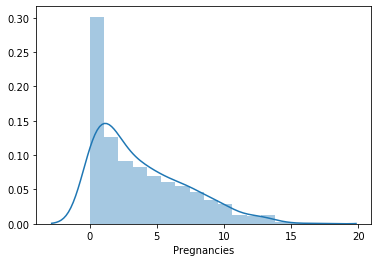

count    768.000000
mean     120.894531
std       31.972618
min        0.000000
25%       99.000000
50%      117.000000
75%      140.250000
max      199.000000
Name: Glucose, dtype: float64
0.17375350179188992


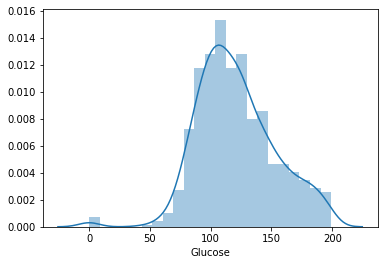

count    768.000000
mean      69.105469
std       19.355807
min        0.000000
25%       62.000000
50%       72.000000
75%       80.000000
max      122.000000
Name: BloodPressure, dtype: float64
-1.8436079833551302


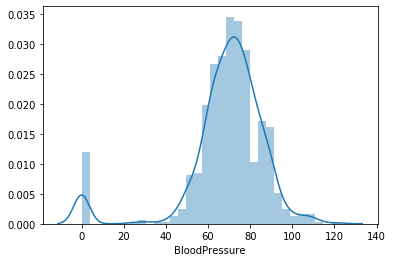

count    768.000000
mean      20.536458
std       15.952218
min        0.000000
25%        0.000000
50%       23.000000
75%       32.000000
max       99.000000
Name: SkinThickness, dtype: float64
0.10937249648187608


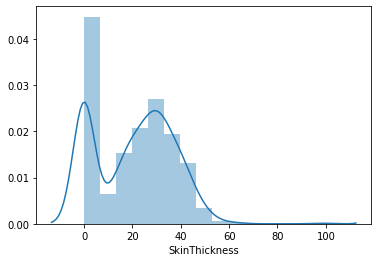

count    768.000000
mean      79.799479
std      115.244002
min        0.000000
25%        0.000000
50%       30.500000
75%      127.250000
max      846.000000
Name: Insulin, dtype: float64
2.272250858431574


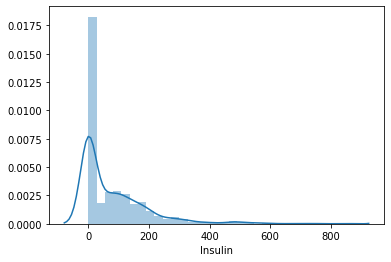

count    768.000000
mean      31.992578
std        7.884160
min        0.000000
25%       27.300000
50%       32.000000
75%       36.600000
max       67.100000
Name: BMI, dtype: float64
-0.42898158845356543


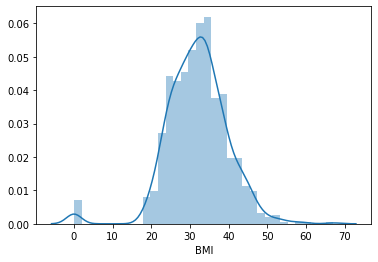

count    768.000000
mean       0.471876
std        0.331329
min        0.078000
25%        0.243750
50%        0.372500
75%        0.626250
max        2.420000
Name: DiabetesPedigreeFunction, dtype: float64
1.919911066307204


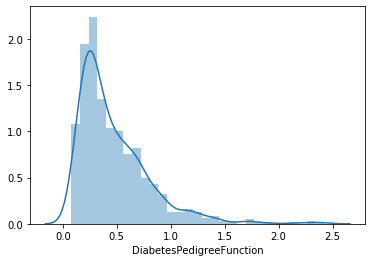

count    768.000000
mean      33.240885
std       11.760232
min       21.000000
25%       24.000000
50%       29.000000
75%       41.000000
max       81.000000
Name: Age, dtype: float64
1.1295967011444805


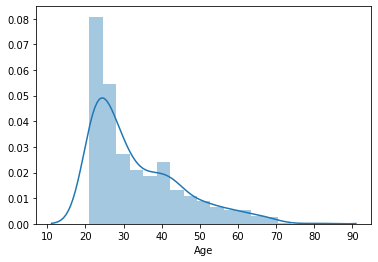

In [56]:
#plotting the graph to knwo the skew 
for i in a:
    print(data[i].describe())
    print(data[i].skew())
    sns.distplot(data[i])
    plt.show()

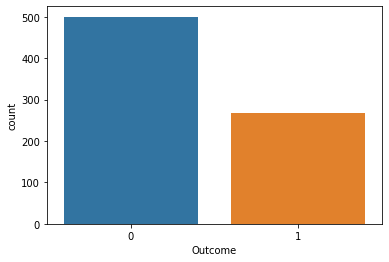

In [57]:
#plotting the box graph
sns.countplot(x="Outcome",data=data)
plt.show()

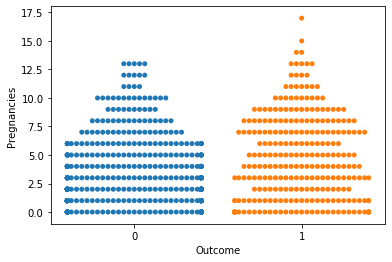

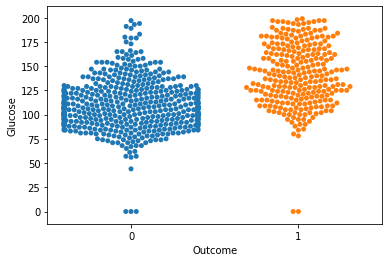

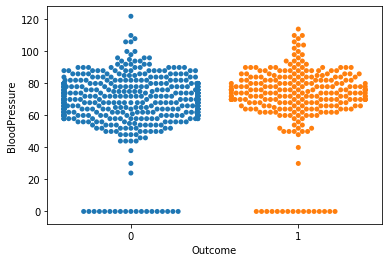

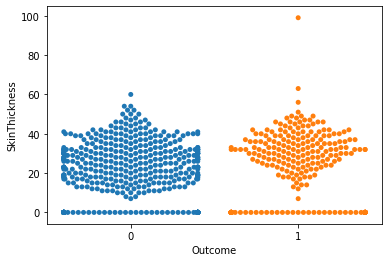

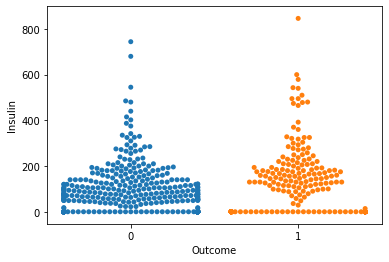

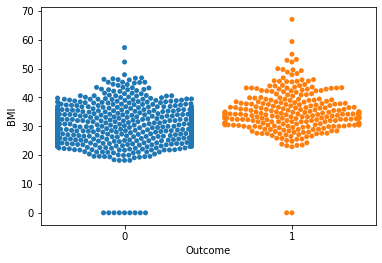

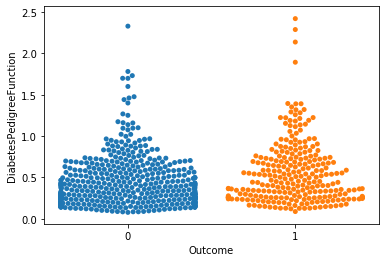

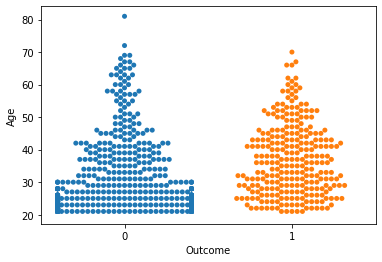

In [58]:
#plotting the swarm plot to analyse the bivariant
for i in a:
    sns.swarmplot(x="Outcome",y=i,data=data)
    plt.show()

As we can see bloodpressure and skinthickness have the same graph with outcome.So we dnt need this for the further analysis 

In [59]:
#drop the dataset which came out to be similar in the bivariant analysis
data=data.drop(['BloodPressure' , 'SkinThickness'] , axis=1)

In [60]:
#converting into 2 sets
x=data.drop("Outcome",axis=1)
y=data["Outcome"]

In [61]:
x.head()

,Pregnancies,Glucose,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,0,33.6,0.627,50
1,1,85,0,26.6,0.351,31
2,8,183,0,23.3,0.672,32
3,1,89,94,28.1,0.167,21
4,0,137,168,43.1,2.288,33


In [62]:
#having the 2 sets training and testing set of data
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,train_size=0.8)

In [63]:
print(xtrain.shape)
print(ytrain.shape)
print(xtest.shape)
print(ytest.shape)

(614, 6)
(614,)
(154, 6)
(154,)


In [64]:
#decision tree plotting
from sklearn.tree import DecisionTreeClassifier,plot_tree
algo=DecisionTreeClassifier(criterion='entropy',max_depth=4)
algo.fit(xtrain,ytrain)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=4, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

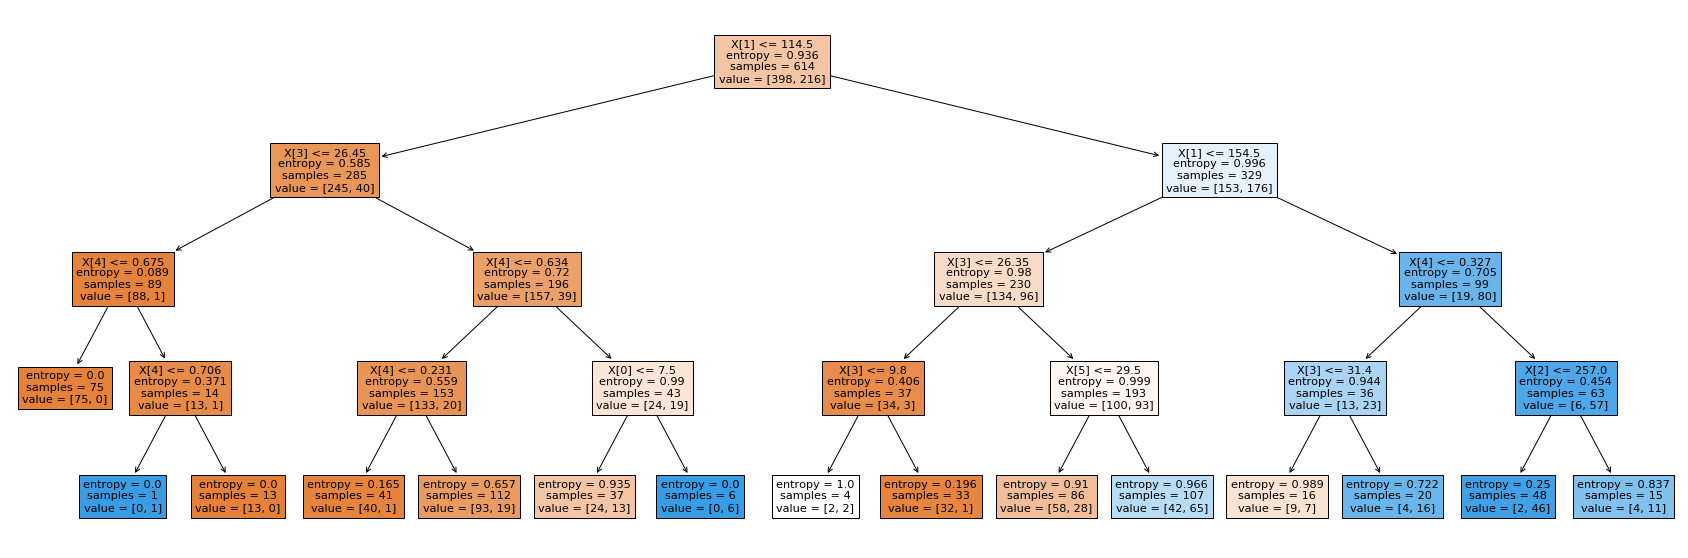

In [65]:
#visualising the decision tree
plt.figure(figsize=(30,10))
plot_tree(algo,filled=True)
plt.show()

In this the Entropy is taken as the criteria of the decision tree. And the decision tree is plotted according to the attributes of the data set. Basically decision tree is typical yes or no questioning, and then plotting takes place.  

In [66]:
#getting to know the confusion matrix and the accuracy
from sklearn.metrics import accuracy_score,confusion_matrix
ypred=algo.predict(xtest)
print(accuracy_score(ytest,ypred))

0.7272727272727273


In [67]:
print(confusion_matrix(ytest,ypred))

[[84 18]
 [24 28]]


In [68]:
#dumping the model to a known file
import joblib
joblib.dump(algo,r"C:\Users\hp\Downloads\model.pkl")

['C:\\Users\\hp\\Downloads\\model.pkl']

As we can see the accuracy of the decision tree is 0.766 which is not a bad value so we can use this model to predict the outcome of the PIMA data set.

In [69]:
model=joblib.load(r"C:\Users\hp\Downloads\model.pkl")

In [70]:
en=joblib.load(r"C:\Users\hp\Downloads\model.pkl")

In [71]:
new=np.array([[3,155,93,28.1,0.164,34]])
data=pd.DataFrame(new)

In [72]:
n=new.astype('float64')
model.predict(n)

array([0], dtype=int64)

In [78]:
new1=np.array([[2,165,0,28.5,0.674,50]])
data=pd.DataFrame(new1)

In [79]:
n1=new1.astype('float64')
model.predict(n1)

array([1], dtype=int64)